Lesson 07 Assignment 
Author: Ajai Shukla
    
Instructions:

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Abalone csv file,  create a new notebook to build an experiment using support vector machine classifier and regression. Perform each of the following tasks and answer the questions:

    Convert the continuous output value from continuous to binary (0,1) and build an SVC
    Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
    Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?
    Show recall, precision and f-measure for the best model
    Using the original data, with rings as a continuous variable, create an SVR model
    Report on the predicted variance and the mean squared error


In [41]:
''' Library Import'''
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
''' SK-Learn Library Import'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

In [42]:
'''Scipy, Stats Library'''
from scipy.stats import skew

In [43]:
''' To Ignore Warning'''
import warnings
warnings.filterwarnings('ignore')

In [44]:
''' To Do : Inline Priting of Visualizations '''
sns.set()
%matplotlib inline

In [45]:
abalone_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names =  ["Sex", "Length", "Diameter", "Height", 
          "Whole Weight", "Shucked Weight", "Viscera Weight", 
          "Shell Weight", "Rings"]
abalone_df = pd.read_csv(abalone_data, 
                      header=None, 
                      names = names)

In [46]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



According to the Infomation:

    1)No-Null data
    2)1 - Object Type
    3)7 - Float Type
    4)1 - Int Type



In [48]:
'''Feature Distirbution of data for Float and Int Data Type'''
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


According to Described Information:

    1)No Feature has Minimum Value = 0, except Height
    2)All Features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).
    3)But Features are close to Normality
    4)All numerical, Except Sex
    5)Each Feature has Different Scale

In [49]:
'''Numerical Features and Categorical Features'''
nf = abalone_df.select_dtypes(include=[np.number]).columns
cf = abalone_df.select_dtypes(include=[np.object]).columns

In [50]:
'''List of Numerical Features'''
nf

Index(['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Rings'],
      dtype='object')

In [51]:
''' List of Categorical Features'''
cf

Index(['Sex'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C006FE2E8>,
      dtype=object)

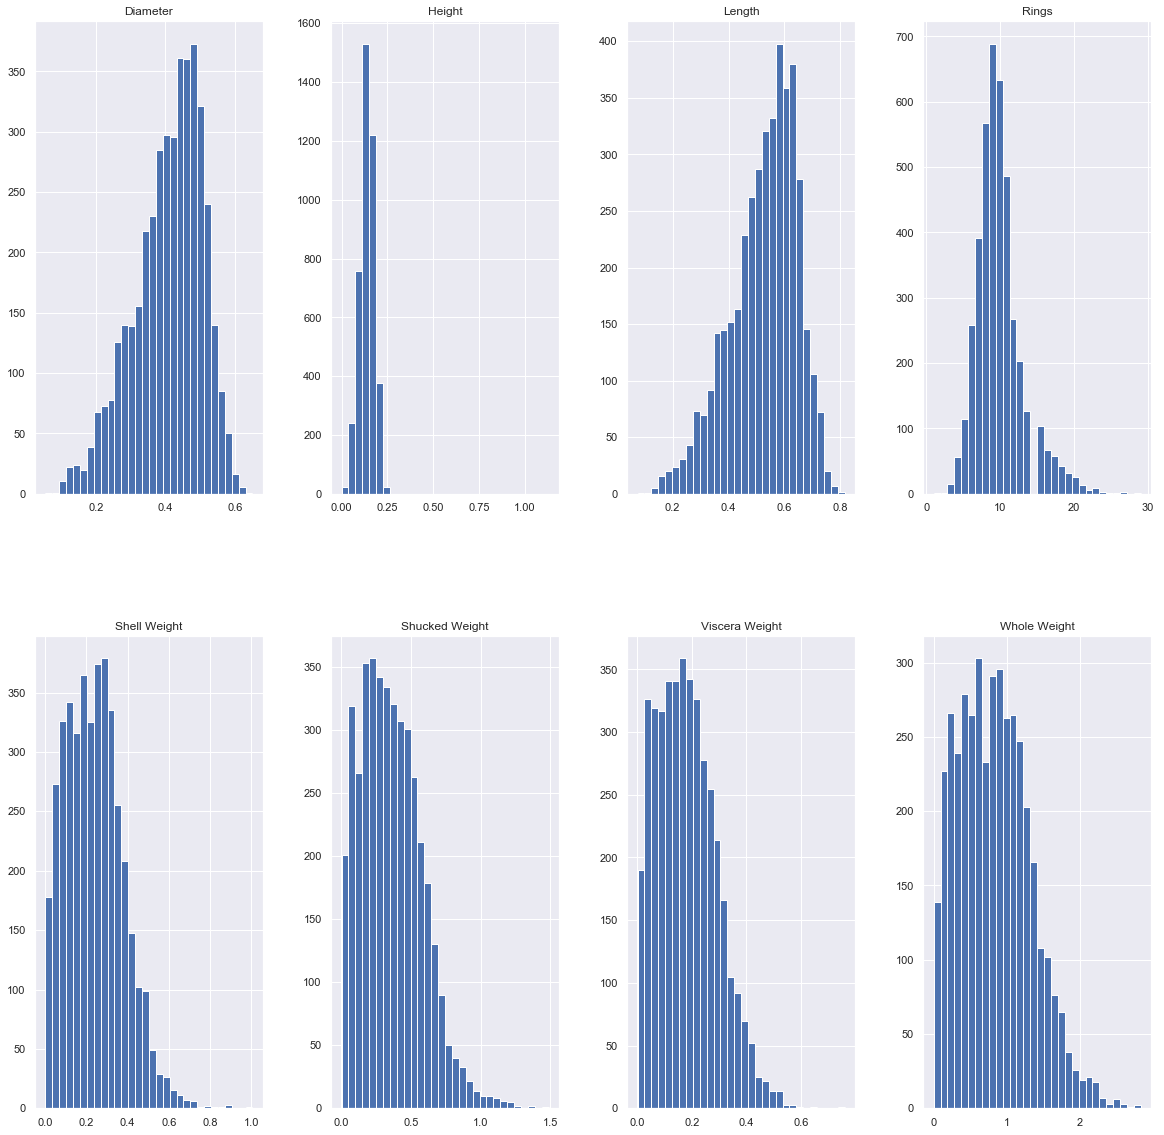

In [52]:
'''Histogram : to see the numeric data distribution'''
abalone_df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [53]:
'''After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness '''
skew_list = skew(abalone_df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [54]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked Weight,0.718840
6,Shell Weight,0.620704
5,Viscera Weight,0.591640
3,Whole Weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


According to the rules

    For a normally Distributed Data, Skewness should be greater than 0
    Skewness > 0 , More weight is on the right tail of the distribution

In [55]:
'''Missing Values '''
mv_df = abalone_df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(abalone_df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [56]:
missing_df

,Missing Values,% Missing
Rings,0,0.0
Shell Weight,0,0.0
Viscera Weight,0,0.0
Shucked Weight,0,0.0
Whole Weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


In [57]:
'''Target Column Analysis'''
print("Value Count of Rings Column")
print(abalone_df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(abalone_df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


No of Classes In Target

In [58]:
print(len(abalone_df.Rings.unique()))

28


Visualization

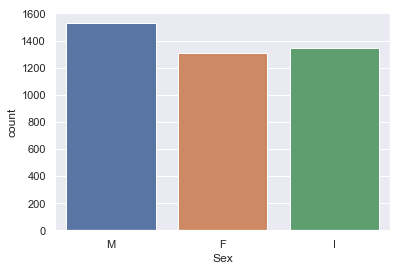

In [59]:
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = abalone_df)

In [60]:
'''Sex Ratio in Abalone'''
print("\nSex Count in Percentage")
print(abalone_df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(abalone_df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [61]:
'''Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5'''
abalone_df['Age'] = abalone_df['Rings'] + 1.5
abalone_df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

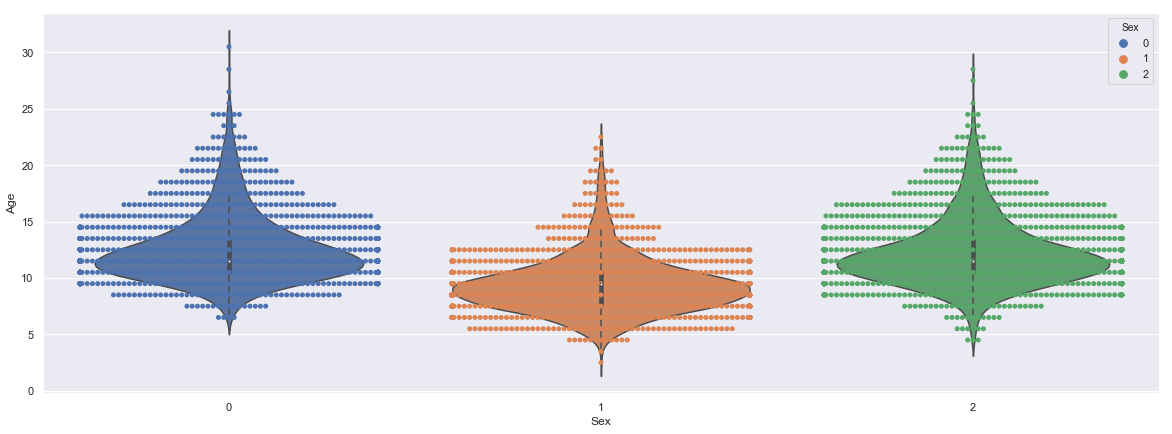

In [69]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = abalone_df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = abalone_df)

According to The above Graph

    Male : Majority Between 7.5 to 19
    Female : Majority Between 8 to 19
    Infant : Majority Between 6 to < 10

In [63]:
abalone_df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole Weight', 
                   'Shucked Weight','Viscera Weight', 'Shell Weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


Preprocessing Data for the Model

In [64]:
'''LabelEnconding the Categorical Data'''
abalone_df['Sex'] = LabelEncoder().fit_transform(abalone_df['Sex'].tolist())

In [65]:
'''One Hot Encoding for Sex Feature '''
transformed_sex_feature = OneHotEncoder().fit_transform(abalone_df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
abalone_df = pd.concat([abalone_df, df_sex_encoded], axis=1)

In [66]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


Data Splitting for Model

    Learning Features
    Predicting Feature
    Train & Test Split

In [67]:
'''Learning Features and Predicting Features'''
Xtrain = abalone_df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = abalone_df['Rings']

In [68]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)


Simple Logistic Regression Model

No of Classes : 28


In [70]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

In [71]:
'''For Both, LabelEncoding and OneHotEncoding -> The accuracy is 25 %'''
result_acc

0.25525743292240755

Simple Logistic Regression Model

    No of Classes : 2
    1 - Rings > 10
    0 - Rings <= 10

In [72]:
'''Creating New Target Variable '''
abalone_df['newRings'] = np.where(abalone_df['Rings'] > 10,1,0)

In [73]:
'''Learning Features and Predicting Features'''
Xtrain = abalone_df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = abalone_df['newRings']

In [74]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

Grid Search with Scikit-Learn

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [109]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [110]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [112]:
gd_sr.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [113]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [114]:
best_result = gd_sr.best_score_
print(best_result)

1.0


# Show recall, precision and f-measure for the best model

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
predictions = logmodel.predict(X_test)

In [94]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       442
           3       1.00      1.00      1.00       456

    accuracy                           1.00      1379
   macro avg       1.00      1.00      1.00      1379
weighted avg       1.00      1.00      1.00      1379



In [95]:
print(confusion_matrix(Y_test, predictions))

[[481   0   0]
 [  0 442   0]
 [  0   0 456]]


In [75]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [76]:
result_acc

0.7722987672226251

# Using the original data, with rings as a continuous variable, create an SVR model
Note : If you have Binary Classification, Logistic Regression is able to Boost to Higher Accuracy
So to Handle Multi-Class Classification, We can Try SVM Model, as it works well for multi-class and multi-label Classification
Multi-Class Classification : When you have one target Column with 3 or more discreet values to predict, you state the problem as multi-class classification.
We WIll first try with all the 28 classes in the target column, using linear kernel , Regularization parameter value as 1, and gamma 1


In [77]:
'''Importing SVM from SK-Learn'''
from sklearn import svm

In [78]:
'''Learning Features and Predicting Features'''
Xtrain = abalone_df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = abalone_df['Rings']

In [79]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [80]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [81]:
result_acc

0.37128353879622916

We can see, the Model Accuracy has increased with SVM, it is now 37 percent.
Lets Try to tweak the model Learning Process and see if the accuracy is increases or not.

In [82]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [83]:
result_acc

0.38143582306018853

We can see, the Model Accuracy has increased with Tweaking SVM parameters, it is now 38 percent.
Lets Try to reduce the number of classes and see how the model is performing

In [84]:
'''Making a Copy of the primary DataSet'''
new_df = abalone_df.copy()

In [85]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(abalone_df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((abalone_df['Rings'] > 8) & (abalone_df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(abalone_df['Rings'] > 10,3,0)

In [86]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [87]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [88]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [89]:
'''Creating Object of SVM'''
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

In [90]:
result_acc

0.9840464104423495

Final Conclusion : we have not removed Outliers ( as we ad to capture all the type of different shapes and weights of abalone ), But with Less number of classes, SVM is giving an accuracy of 98% ( not Fully Tested ).¶